## Starting Off:



In [29]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

# EDA and Feature Engineering 

## Data Preparation

This consists of cleaning up and modifying your current variables to make them more usable within the model.  This could include:

- Changing the data type to something usable. 
    - *Converting a string '3' to float 3*
    - *Creating dummy variables*
    - *Converting a time date stamp to a usable format
- Removing outliers
- Handling missing data
    - Removing observations with missing data points.
    - Substituting in another value for the missing value.
    

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-6/multiple_linear_regression/cleaned_movie_data.csv',index_col=0)


In [31]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,PG-13,0,0,0,1,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,PG-13,0,0,0,1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,PG-13,0,0,0,1,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,PG-13,0,0,0,1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,PG-13,0,0,0,1,0


In [32]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
rating                        object
G

In [33]:
df['title_year'] = df['title_year'].astype(str)

In [34]:
df['title_year'] = pd.to_datetime(df['title_year'], format='%Y.0')

In [35]:
df['title_year'].head()

0   2009-01-01
1   2007-01-01
2   2015-01-01
3   2012-01-01
5   2012-01-01
Name: title_year, dtype: datetime64[ns]

Previously we've dealt with the date of year built by subtracting the year this data was released to create a column showing how many years old the data is.  

In [36]:
df['yr_old'] =  df['title_year'].map(lambda x: 2016-x.year )

In [37]:
df['yr_old'].describe()

count    4156.000000
mean       12.732435
std         9.945465
min         0.000000
25%         6.000000
50%        11.000000
75%        17.000000
max        96.000000
Name: yr_old, dtype: float64

In [38]:
df = df[df['yr_old']<25]

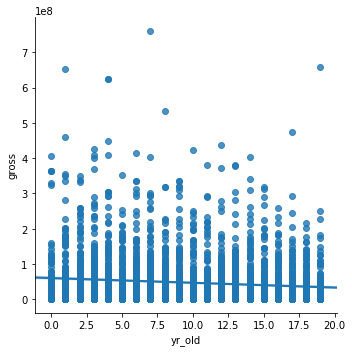

In [39]:
sns.lmplot(x='yr_old', y='gross', data=df[df['yr_old']<20],fit_reg=True)

## Removing Outliers

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Handling Missing Data:
    
Imagine that the 'grade' value was missing from 15% of your data. You don't want to drop those observations becasue  it is a significant chunk of your data.  Also you did some data exploration and you realize that the 'grade' tends to be missing more for smaller  and  older houses.  

**How would you go about filling in the missing grade values?**

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is to :
- answer questions, test business assumptions, generate hypotheses for further analysis
- prepare the data for modeling 

The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future 
modeling.

There are a lot of ways to reach these goals: you can get a basic description of the data, visualize it, identify patterns in it, identify challenges of using the data, etc.

In [40]:
df = df[df['gross']>5000000]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d2d3898>]],
      dtype=object)

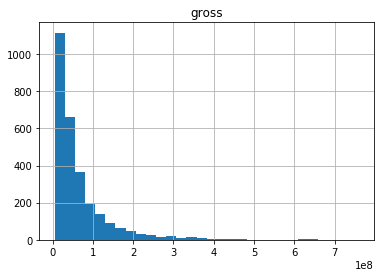

In [41]:
df.hist(column=['gross'], bins=30)

In [42]:
df['gross'].describe()

count    2.819000e+03
mean     6.372996e+07
std      7.336741e+07
min      5.002310e+06
25%      1.840997e+07
50%      3.843282e+07
75%      7.836844e+07
max      7.605058e+08
Name: gross, dtype: float64

In [43]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'rating',
 'G',
 'Other',
 'PG',
 'PG-13',
 'R',
 'yr_old']

In [44]:
features =  ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'yr_old']

In [45]:
df[features].dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
yr_old                       float64
dtype: object

In [46]:
sns.pairplot(df, diag_kind="kde", height=2.5)

Error in callback <function flush_figures at 0x11c9b48c8> (for post_execute):


KeyboardInterrupt: 

In [48]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

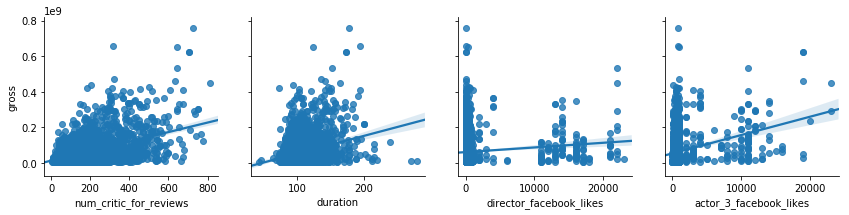

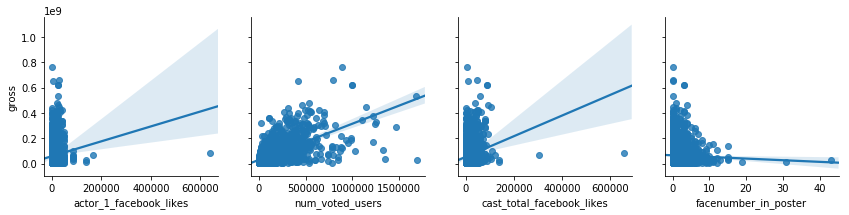

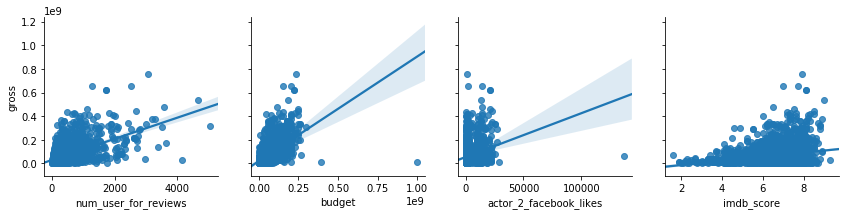

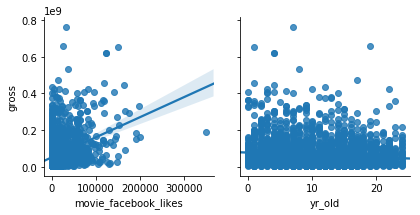

In [49]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

## Scaling Data


In [50]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a8fe518>]],
      dtype=object)

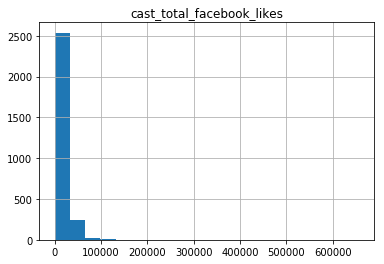

In [51]:
df.hist(column='cast_total_facebook_likes', bins=20)

In [52]:
df['cast_total_facebook_likes_scaled'] = scaler.fit_transform(df[['cast_total_facebook_likes']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a705240>]],
      dtype=object)

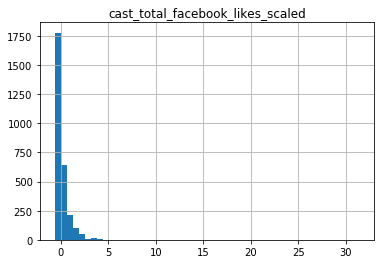

In [53]:
df.hist(column='cast_total_facebook_likes_scaled', bins=50)

## Capturing Non-linear relationships



We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

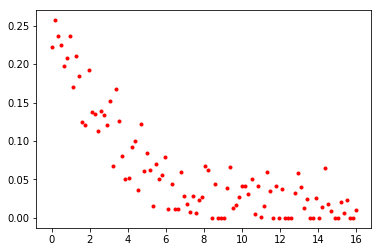

In [54]:
x = np.linspace(0, 16, 100)
Y = [0.27*exp(-0.27*_) for _ in x]
error = norm.rvs(0, scale=0.03, size=100)
simulated_data = [max(0, y+e) for (y,e) in zip(Y,error)]

# plt.plot(x, Y, 'b-')
plt.plot(x, simulated_data, 'r.')
plt.show()

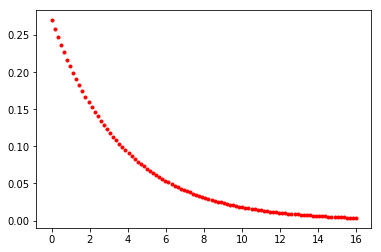

In [55]:
plt.plot(x, Y, 'r.')
plt.show()

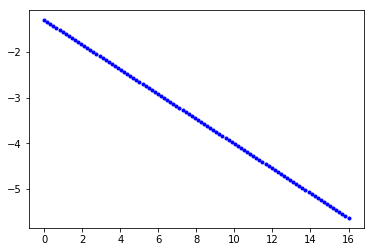

In [56]:
plt.plot(x, np.log(Y), 'b.')
plt.show()

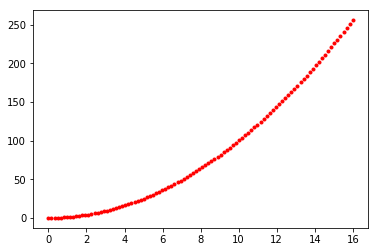

In [57]:
y = x*x

plt.plot(x, y, 'r.')
plt.show()


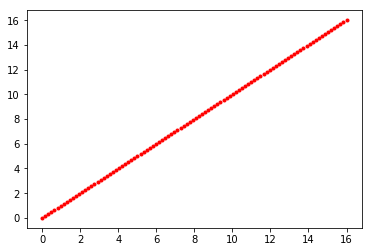

In [69]:
plt.plot(x, np.sqrt(y), 'r.')
plt.show()

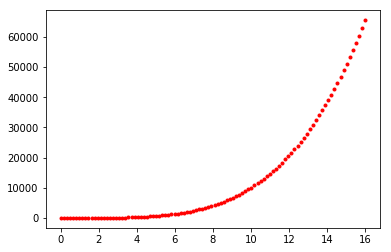

In [58]:
plt.plot(x,y*y, 'r.')
plt.show()

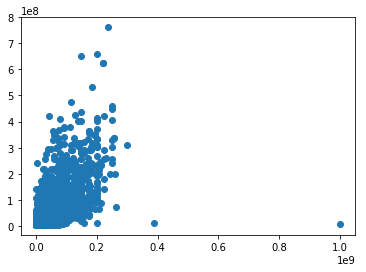

In [59]:
plt.scatter( df['budget'], df['gross'])
#is this linear??? let's see down in the next code block

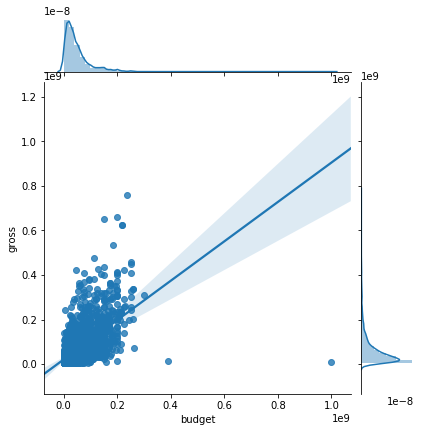

In [60]:
sns.jointplot(x="budget", y="gross", data=df, kind="reg");
# gives us a histogram of the x and histogram of the y, so we can see where data is clustering
# this kiiiiinda looks like there's some relationship there! Let's do more work.

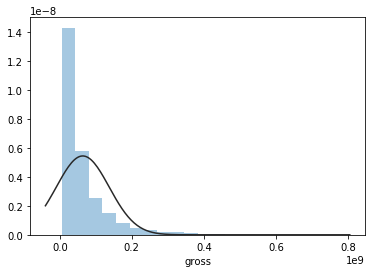

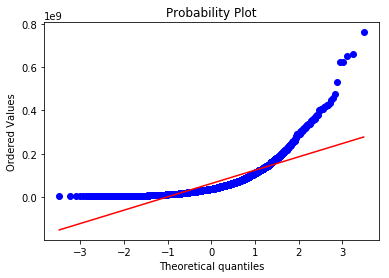

In [71]:
#histogram and normal probability plot
sns.distplot(df['gross'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['gross'], plot=plt)
# okay, not perfectly normally distributed, but we don't need a normal distribution
# what we DO need, is normally distributed residuals, so that we know we have a 
# good fit!

In [72]:
df['gross_log'] = np.log(df['gross'])


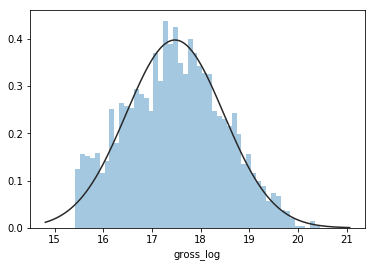

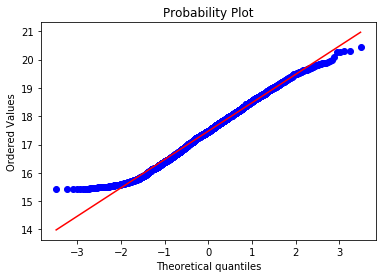

In [74]:
#transformed histogram and normal probability plot
sns.distplot(df['gross_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['gross_log'], plot=plt)
# okay, so we look more normal, once we've taken the log

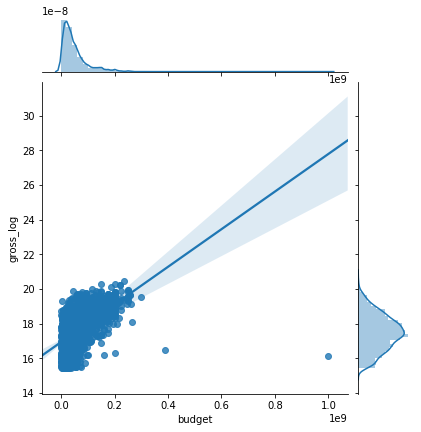

In [75]:
sns.jointplot(x="budget", y="gross_log", data=df, kind="reg")

In [76]:
df['budget_log'] = np.log(df['budget'])
# okay so now we're going to take a log of budget, and see if that helps

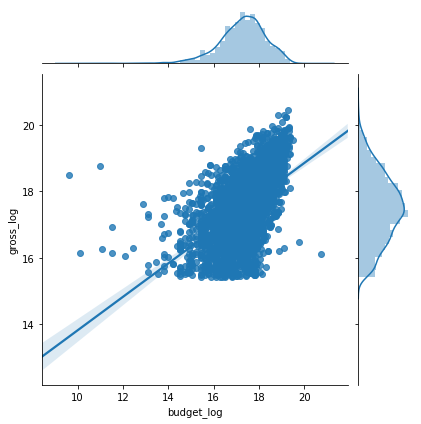

In [77]:
sns.jointplot(x="budget_log", y="gross_log", data=df, kind="reg")
# okay, so it looks like maybe we're a little better at predicting here

***We can now use the natural log of price as our new target variable. We jsut need to undo this transformation after our predictions.***

`np.exp(df['gross_log']) `

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

In [78]:
np.exp(df['gross_log']) 


0       7.605058e+08
1       3.094042e+08
2       2.000742e+08
3       4.481306e+08
5       7.305868e+07
6       3.365303e+08
7       2.008073e+08
8       4.589916e+08
9       3.019570e+08
10      3.302491e+08
11      2.000694e+08
12      1.683684e+08
13      4.230326e+08
14      8.928991e+07
15      2.910216e+08
16      1.416140e+08
17      6.232795e+08
18      2.410639e+08
19      1.790209e+08
20      2.551084e+08
21      2.620307e+08
22      1.052197e+08
23      2.583554e+08
24      7.008352e+07
25      2.180513e+08
26      6.586723e+08
27      4.071973e+08
28      6.517316e+07
29      6.521773e+08
30      3.043603e+08
            ...     
4659    7.098492e+06
4676    5.518918e+06
4678    7.705974e+06
4681    4.263817e+07
4688    7.830611e+06
4694    2.180513e+08
4695    3.204881e+07
4707    1.405301e+08
4723    3.345148e+07
4726    3.050088e+07
4729    8.044906e+06
4730    5.739376e+06
4752    1.773437e+08
4769    3.718867e+07
4778    2.349031e+08
4791    4.454096e+07
4793    1.079

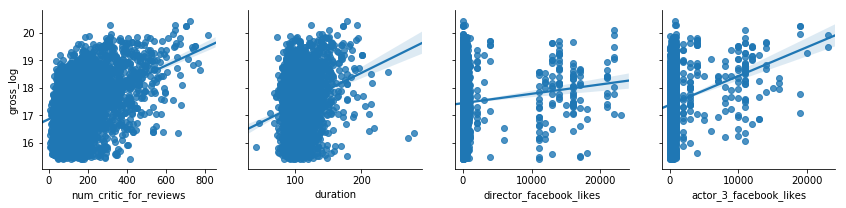

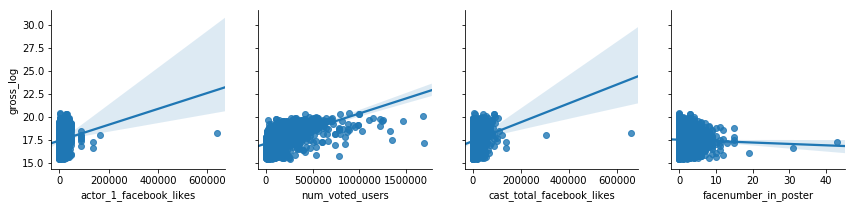

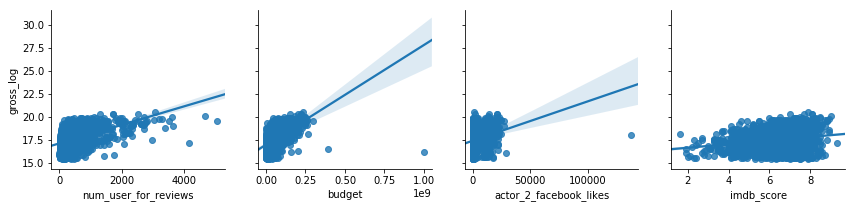

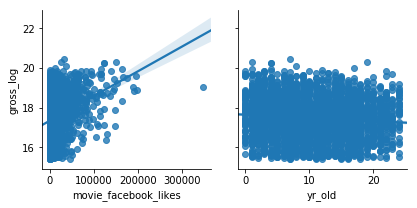

In [68]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross_log'],x_vars=i, kind="reg", height=3)

<img src='transformations.png'/>

## Polynomial Features 
<img src='noisy-sine-third-order-polynomial.png' width=500 />


In [ ]:
df['budget_2'] = df['budget']*df['budget']

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**,  what do you think the relationships between temperature and Citibike rentals is?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that box office gross, what are two possible features that could be interacted with eachother to better show the relationship to the gross?

You can go in an multiply one variable and another. 

In [79]:
df['r_budget'] = df['budget']*df['R']

In [80]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R,yr_old,cast_total_facebook_likes_scaled,gross_log,budget_log,r_budget
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,33000,PG-13,0,0,0,1,0,7.0,-0.401753,20.449494,19.283571,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,0,PG-13,0,0,0,1,0,9.0,1.721199,19.550159,19.519293,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015-01-01,393.0,6.8,85000,PG-13,0,0,0,1,0,1.0,-0.066791,19.114199,19.316769,0.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,164000,PG-13,0,0,0,1,0,4.0,4.570714,19.920595,19.336971,0.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,24000,PG-13,0,0,0,1,0,4.0,-0.546207,18.106773,19.390323,0.0


In [86]:
df[['r_budget','budget','R']]

,r_budget,budget,R
0,0.0,237000000.0,0
1,0.0,300000000.0,0
2,0.0,245000000.0,0
3,0.0,250000000.0,0
5,0.0,263700000.0,0
6,0.0,258000000.0,0
7,0.0,260000000.0,0
8,0.0,250000000.0,0
9,0.0,250000000.0,0
10,0.0,250000000.0,0


This willl give us some coefficient in our model that will describe what happens when your movie is rated r. if it's not an r rated movie, then nothing happens because the coefficient will be 0, since we're multiplying by a categorical variable. this helps you model the relationship a little more.

## Geospatial Data

This dataset currently comes with the latitude and longitude of each house. This is probably not that useful for us. So now we need  to think about how to transform this data into something more useful.

Looking at the map below, which aparment might cost more to rent 1  or 2?
Why?

<img src='geospatial_vars.png'/>

Looking at this map of East Harlem, how could  we transform lat and long into a more useful data point?


## Time Aggregations:

Imagine this situation. 

You are trying to predict sales for a bar in Williamsburg that has an outdoor patio. You know that weather impacts the sales and want to include it in your features.  

Right now you have weather data at a hourly level, but your sales data is at a daily level. How should we aggregate/convert our hourly data into our daily data?

**EX:** For temperature, I believe that what is most important is how warm it got that day, so I take my hourly data and `resample`  it to give me the max for the day.  

```df['temp'].resample('D').max()```

### Question
Now let's think about this for rain.  Talk with your partner and come up with 3 ways that you can take hourly rain measurements and aggregate it up to a daily level. 

***Hint:*** The outdoor space is primarily used from 12-8pm.  